# Load data

In [214]:
import pandas as pd
dataset_scores = pd.read_pickle('labels.pkl')
features = pd.read_pickle('features.pkl')
dataset_scores_rm=pd.read_pickle('labels_rm.pkl')
features_rm=pd.read_pickle('features_rm.pkl')

# Import function & library 

In [215]:
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.model_selection import GroupShuffleSplit

In [216]:
from sklearn import svm
from sklearn import multiclass 
from scipy import stats

In [217]:
from sklearn.preprocessing import normalize
from sklearn import utils

In [218]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Define functions for grid search and scoring**

In [219]:
def CV_Generator(features, labels, group_label, n=8, test_ratio=0.2):
    CV_Group = GroupShuffleSplit(n_splits=n, test_size=test_ratio, random_state=8)
    for train, test in CV_Group.split(features, labels, groups=group_label):
        yield train, test

In [220]:
def accuracy(y_true, y_pred):
    ratio = abs(y_true - y_pred) / y_true
    return 1 - np.mean(ratio)

In [221]:
def rmse(y_true, y_pred):
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    return rmse

def lcc(y_true, y_pred):
    lcc, _ = stats.pearsonr(y_true, y_pred)
    return lcc

def srocc(y_true, y_pred):
    srocc, _ = stats.spearmanr(y_true, y_pred)
    return srocc

In [222]:
features.head()

,msssim,psnr,psnrhvs,psnrhvsm,ssim,vifp,Blockiness,Blockloss,Blur,Contrast,Exposure(bri),Flickering,Interlace,Noise,SA,TA
G10BoatInPark_ERP_4096x2048_fps30_qp27_14547k.mp4,0.993424,41.829451,39.401728,43.855814,0.989905,0.818723,0.918001,4.662472,6.318822,56.274408,122.973648,0.973981,0.004543,0.385048,48.017774,12.572215
G10BoatInPark_ERP_4096x2048_fps30_qp37_3270k.mp4,0.978172,37.045777,34.074029,36.540714,0.975696,0.721947,0.923023,5.707591,6.802874,56.220687,122.235861,0.974016,0.001439,0.250219,45.613703,12.228131
G10BoatInPark_ERP_4096x2048_fps30_qp42_1507k.mp4,0.959965,34.534499,31.430402,33.216521,0.962685,0.672978,0.923070,6.641128,7.194109,56.157094,121.932088,0.973082,0.001407,0.243489,42.835611,11.782598
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp27_6105k.mp4,0.997337,46.713699,44.069635,48.525252,0.997130,0.915188,0.941557,1.083126,10.663758,107.170623,125.000000,0.975835,0.000408,0.691092,55.521111,3.173898
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp37_913k.mp4,0.993475,42.391911,39.490941,42.097111,0.994158,0.873338,0.916841,0.990191,10.873596,107.176925,124.268885,0.970290,0.001945,0.350776,55.119636,3.099582


**Perform Principal Component Analysis(PCA)**

In [223]:
pca=PCA(n_components=1)
pca.fit(features)
X=pca.transform(features)

In [224]:
#sort the feature after PCA and the datascores
x_sort=np.sort(X,axis=0)
x_index=np.argsort(X,axis=0)
dataset_scores_sort=dataset_scores[x_index]

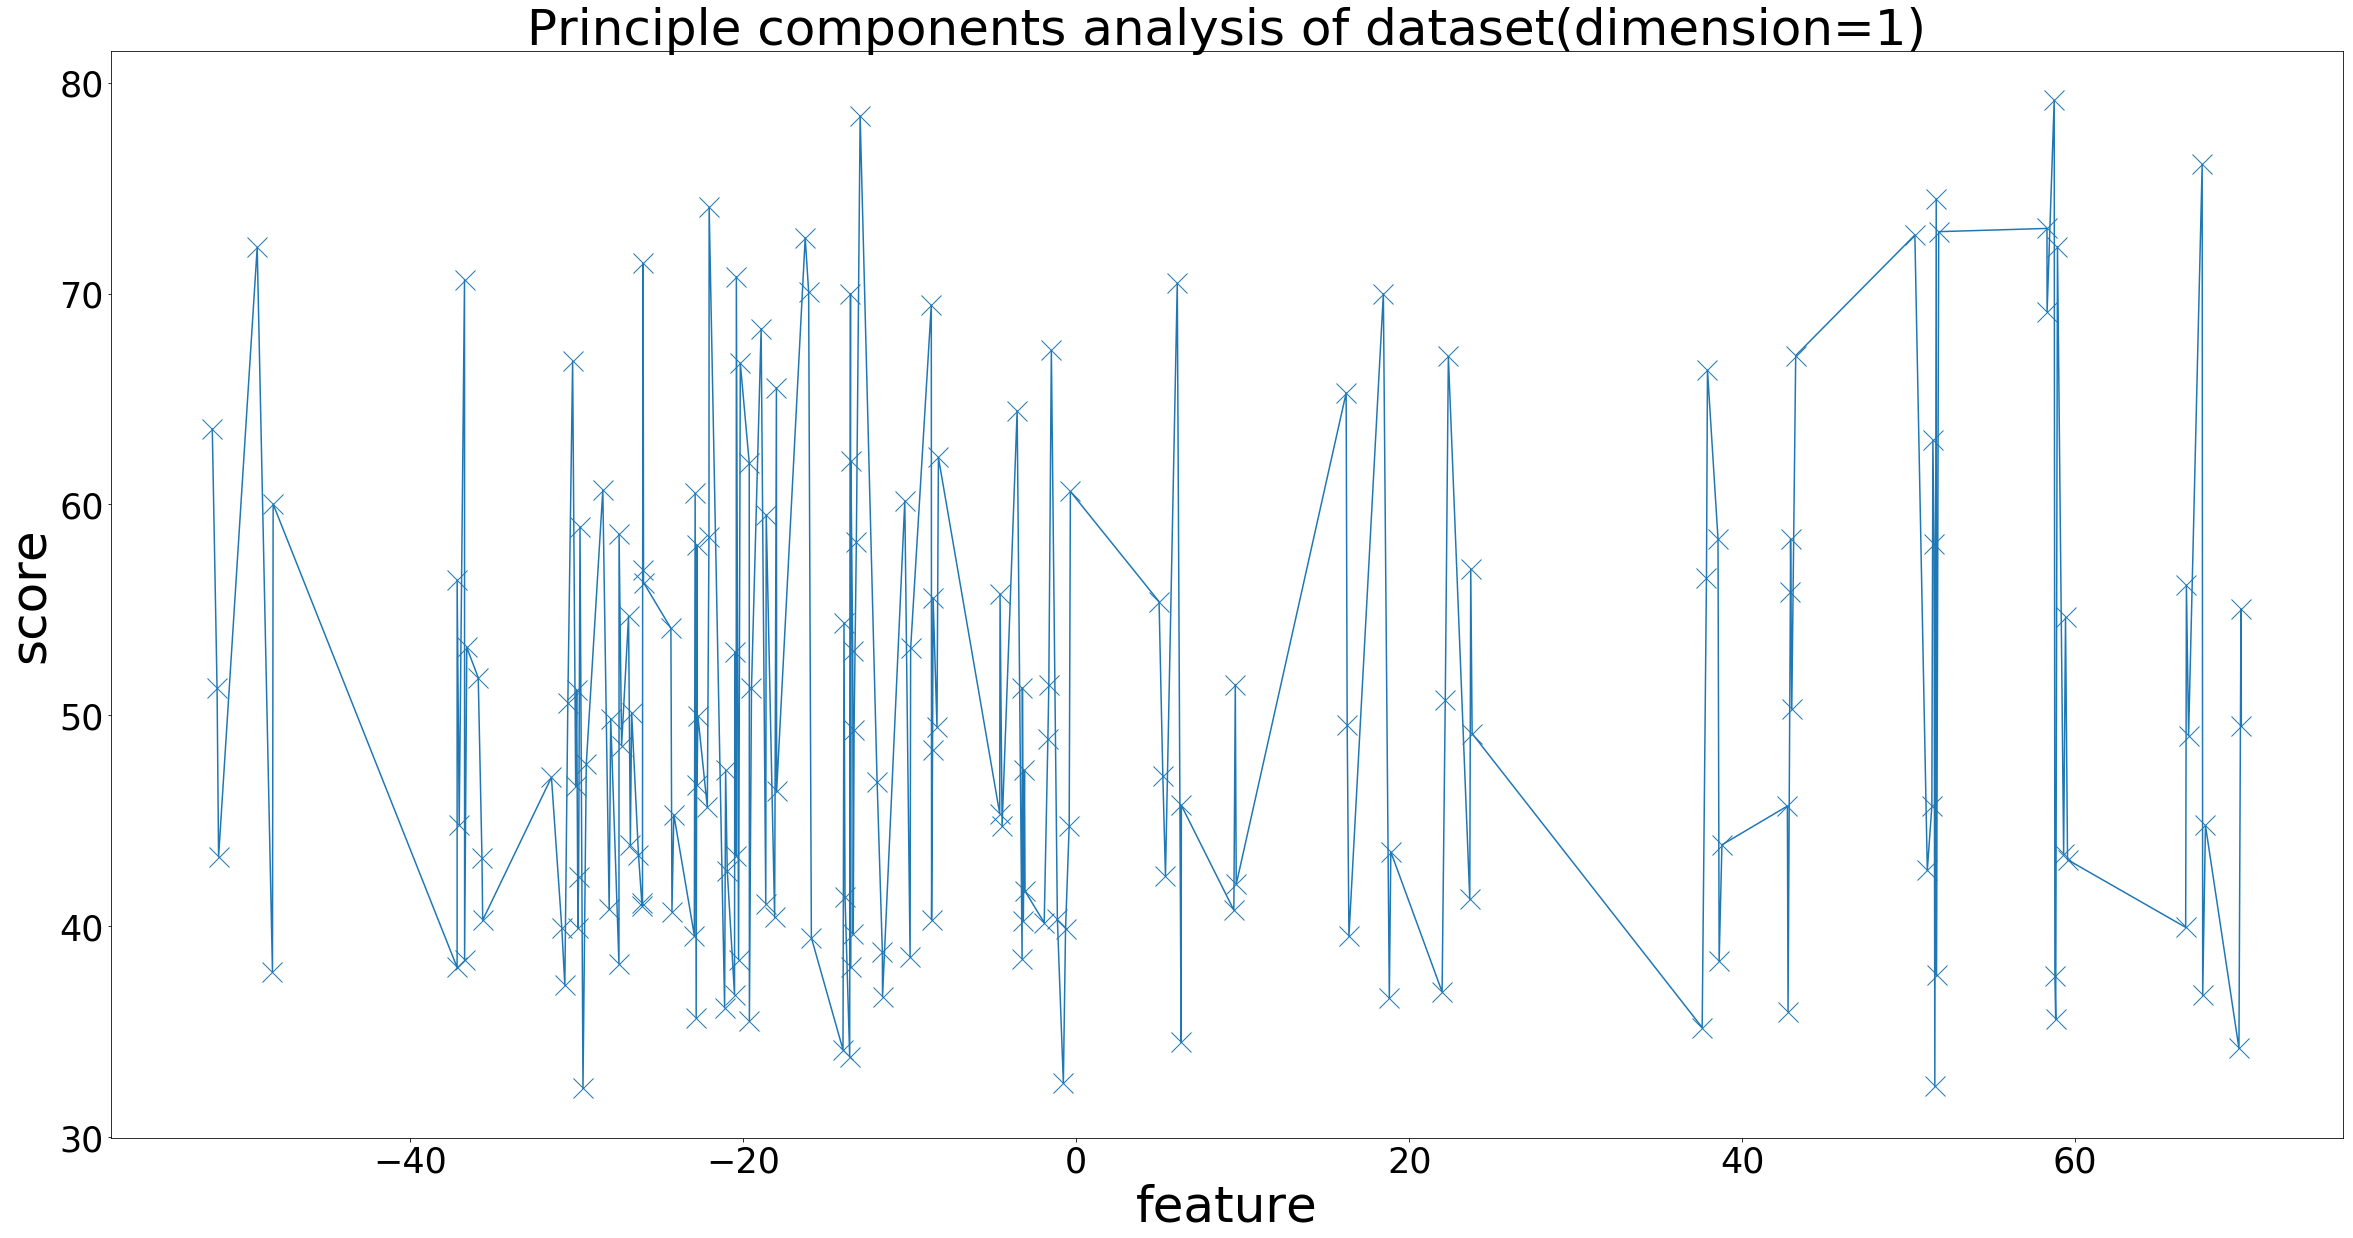

In [225]:
fig, ax1 = plt.subplots(figsize=(40,20))
ax1.plot(x_sort,dataset_scores_sort,'-x',markersize=20)
ax1.tick_params(labelsize=35)
ax1.set_xlabel('feature',fontsize=50)
ax1.set_ylabel('score',fontsize=50)
ax1.set_title('Principle components analysis of dataset(dimension=1)',fontsize=50)
plt.savefig('pca.pdf')

In [226]:
group_label = np.arange(len(features.index) / 3)
group_label = np.matlib.repmat(group_label,3,1)
group_label = group_label.reshape(-1,1, order='F')

In [227]:
scorer = {}
scorer['rmse'] = metrics.make_scorer(rmse, greater_is_better=False)
scorer['lcc'] = metrics.make_scorer(lcc, greater_is_better=True)
scorer['srocc'] = metrics.make_scorer(srocc, greater_is_better=True)
scorer

{'rmse': make_scorer(rmse, greater_is_better=False),
 'lcc': make_scorer(lcc),
 'srocc': make_scorer(srocc)}

# grid search

In [228]:
#define svr model
model_svr = svm.SVR(max_iter=3000)

In [229]:
#grid search for the best parameters for SVR
ParameterGrid={}
ParameterGrid['C']=np.arange(1,50,1) 
ParameterGrid['gamma']= [0.01, 0, 'auto', 'scale']
ParameterGrid['verbose'] = [0, 1]
ParameterGrid['degree'] = [2, 3]
ParameterGrid['kernel'] = ['rbf', 'poly']
ParameterGrid['tol'] = [0.1, 0.01, 0.001]
#ParameterGrid['epsilon'] = np.arange(0.05,0.15,0.01)

In [230]:
grid_search_svr= GridSearchCV(estimator = model_svr, param_grid = ParameterGrid, 
                          cv = CV_Generator(features, dataset_socres, group_label), n_jobs = -1, verbose = 1, return_train_score=True, 
                                      error_score = np.nan,scoring = scorer, refit = 'rmse', iid=False)

In [231]:
a = normalize(features,norm='l2')

In [232]:
dataset_scores.shape

(177,)

In [233]:
grid_search_svr.fit(a, dataset_scores)

Fitting 8 folds for each of 4704 candidates, totalling 37632 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7212 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 14912 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 24812 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 36912 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 37632 out of 37632 | elapsed:   39.8s finished


GridSearchCV(cv=<generator object CV_Generator at 0x1a3194a8e0>,
       error_score=nan,
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=3000, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'gamma': [0.01, 0, 'auto', 'scale'], 'verbose': [0, 1], 'degree': [2, 3], 'kernel': ['rbf', 'poly'], 'tol': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit='rmse', return_train_score=True,
       scoring={'rmse': make_scorer(rmse, greater_is_better=False), 'lcc': make_scorer(lcc), 'srocc': make_scorer(srocc)},
       verbose=1)

In [236]:
grid_search_svr.best_params_

{'C': 49,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'tol': 0.01,
 'verbose': 0}

In [238]:
idx = 0
for train_idx, test_idx in CV_Generator(features, dataset_socres, group_label, 40, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = dataset_socres.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = dataset_socres.iloc[test_idx]
    best_model = grid_search_svr.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    if idx == 0:
        final_model = best_model
        print('Model saved')
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1

Model saved
RMSE: 4.369923805357804 13.521487297954152
LCC: 0.9660384476751348 0.6101501431529864
SROCC: 0.9702309283696299 0.6486486486486487


RMSE: 4.515499503552019 16.641256972624262
LCC: 0.9540910093163553 0.5935088178280413
SROCC: 0.9625700614009336 0.5886743886743887


RMSE: 4.924378413639937 10.54844550645241
LCC: 0.9602223812822673 0.6138332130306798
SROCC: 0.9629735861980392 0.5997425997425998


RMSE: 4.426908714957296 12.09557314624758
LCC: 0.9644149975610411 0.6198592198738977
SROCC: 0.962351729903083 0.6203346203346204


RMSE: 3.4141546194907915 13.217540595020703
LCC: 0.9813660539607133 0.5158043458656938
SROCC: 0.9866935514085355 0.4741312741312742


RMSE: 3.8851728852769214 12.34415727610502
LCC: 0.9738213904190796 0.6303946800445506
SROCC: 0.9795442651063713 0.6084942084942085


RMSE: 5.032196195208915 9.94776219207187
LCC: 0.9542082528948167 0.8256176510606246
SROCC: 0.9626000284692661 0.8617760617760618


RMSE: 4.474907345474955 11.169059128781088
LCC: 0.96142381473

#  plot results 

In [239]:
import matplotlib.pyplot as plt

In [240]:
pre_score_train=final_model.predict(train_features)
#prediction on the test set
pre_score_test=final_model.predict(test_features)

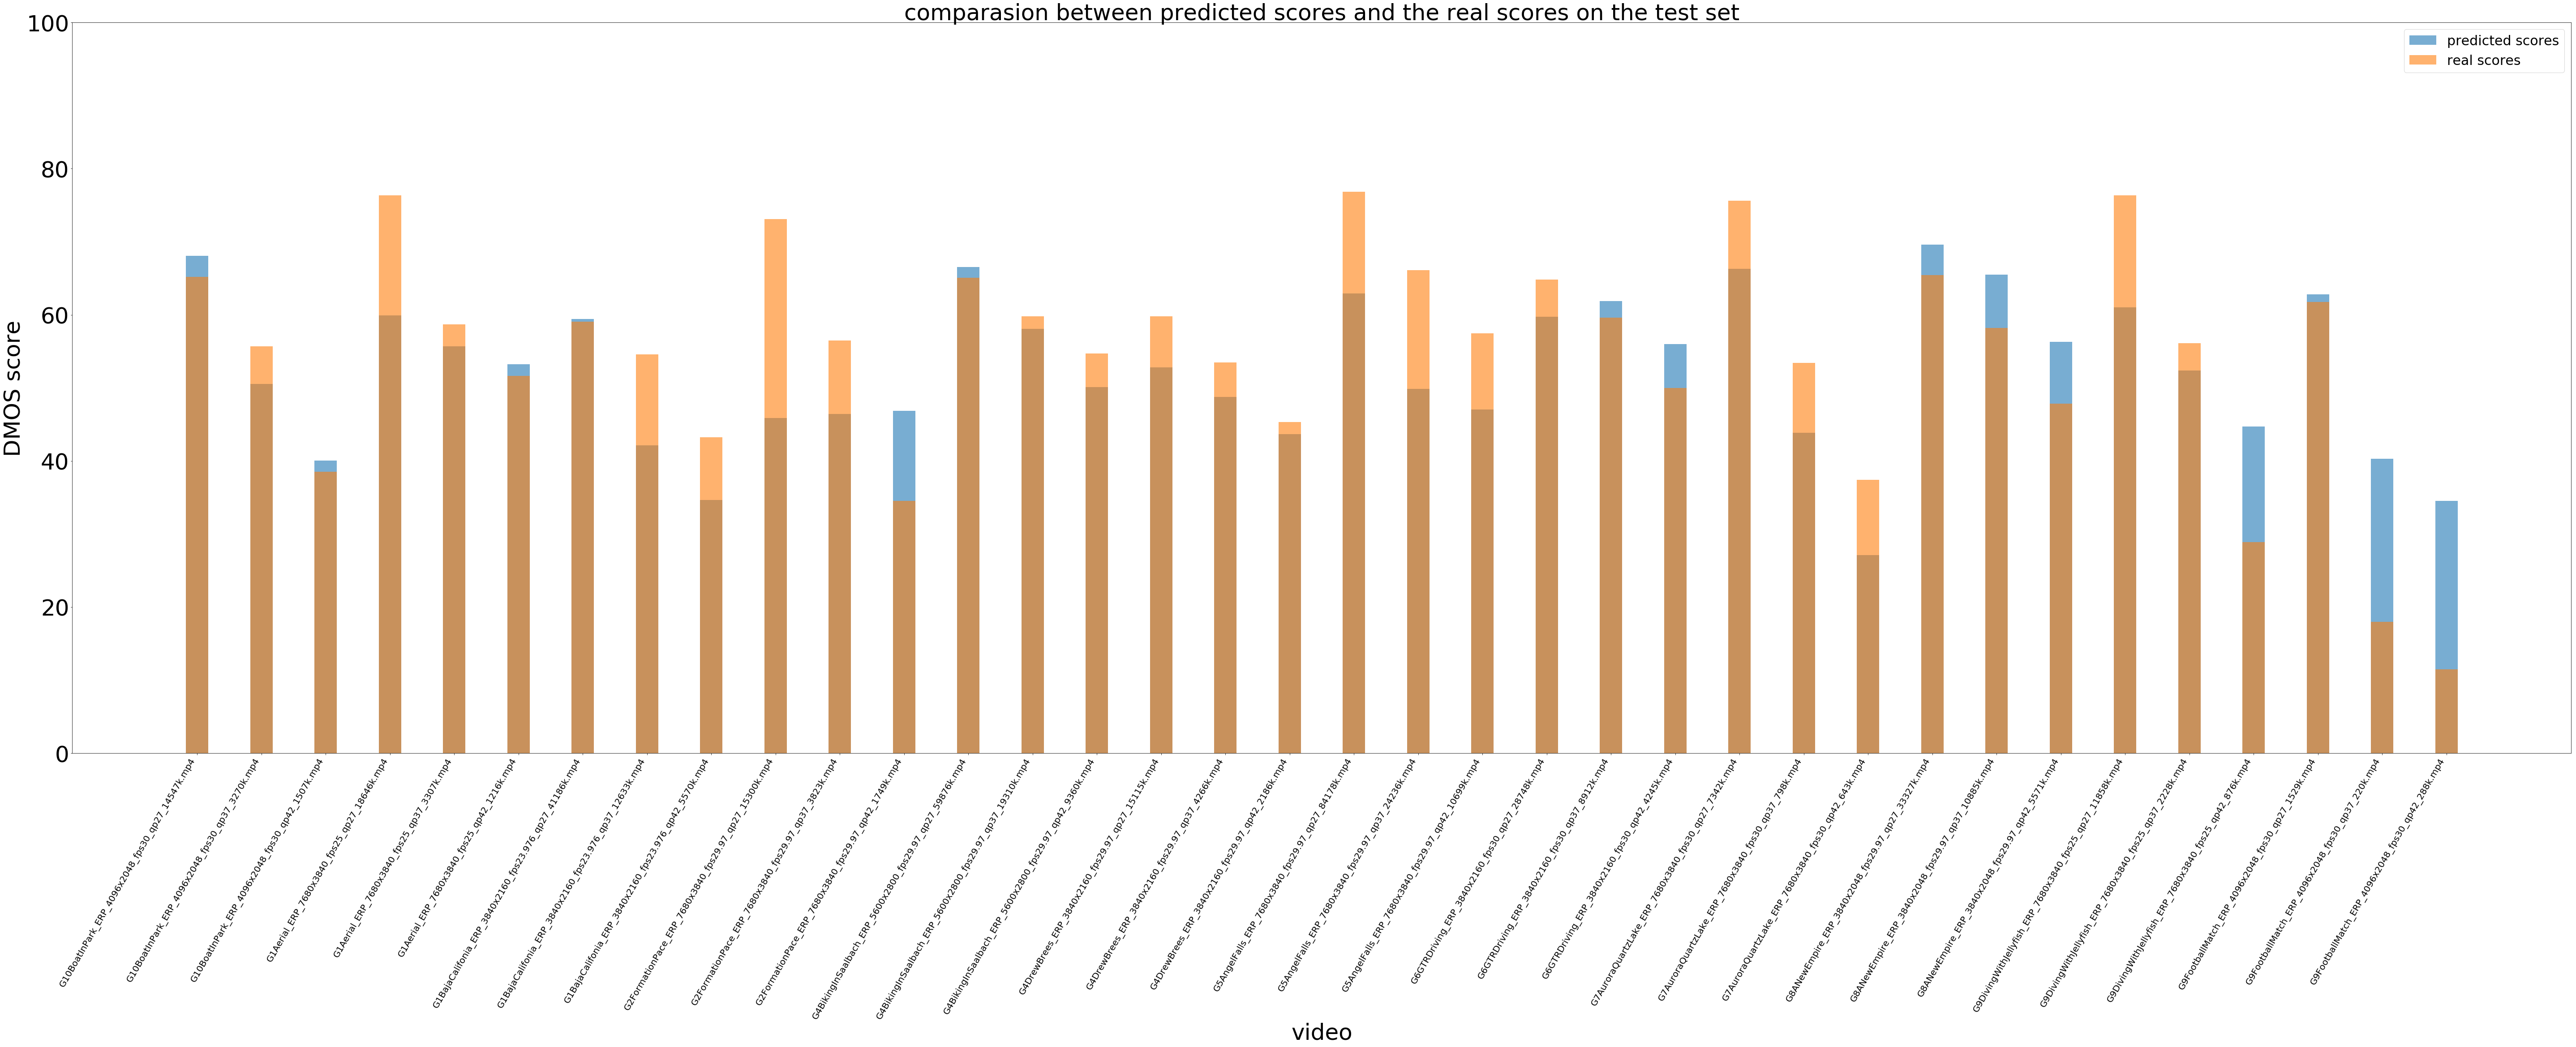

In [241]:
plt.subplots(figsize=(100,30))
plt.title('comparasion between predicted scores and the real scores on the test set',fontsize=50) 
plt.xlabel('video',fontsize=50)
plt.ylabel('DMOS score',fontsize=50)
y_label=test_labels.index
plt.tick_params(labelsize=50)
# set interval for y label
plt.xticks(np.arange(test_labels.index.size),y_label,rotation = 60, fontsize = 20,ha='right')
plt.ylim([0,100])
plt.bar(np.arange(test_labels.index.size),pre_score_test,label="predicted scores",width=0.35,alpha=0.6,linewidth=20)
plt.bar(np.arange(test_labels.index.size),test_labels,label="real scores",width=0.35,alpha=0.6,linewidth=20)
plt.legend(fontsize=30)
plt.savefig("comparasion_predit_real.pdf")

# model comparison

In [242]:
# do CV with the same grid search parameters using removed dataset scores
idx = 0
for train_idx, test_idx in CV_Generator(features, dataset_socres_rm, group_label, 16, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = dataset_socres.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = dataset_socres.iloc[test_idx]
    best_model = grid_search_svr.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    if idx == 5:
        final_model_score_rm = best_model
        print('Model saved')
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1

RMSE: 4.369923805357804 13.521487297954152
LCC: 0.9660384476751348 0.6101501431529864
SROCC: 0.9702309283696299 0.6486486486486487


RMSE: 4.515499503552019 16.641256972624262
LCC: 0.9540910093163553 0.5935088178280413
SROCC: 0.9625700614009336 0.5886743886743887


RMSE: 4.924378413639937 10.54844550645241
LCC: 0.9602223812822673 0.6138332130306798
SROCC: 0.9629735861980392 0.5997425997425998


RMSE: 4.426908714957296 12.09557314624758
LCC: 0.9644149975610411 0.6198592198738977
SROCC: 0.962351729903083 0.6203346203346204


RMSE: 3.4141546194907915 13.217540595020703
LCC: 0.9813660539607133 0.5158043458656938
SROCC: 0.9866935514085355 0.4741312741312742


Model saved
RMSE: 3.8851728852769214 12.34415727610502
LCC: 0.9738213904190796 0.6303946800445506
SROCC: 0.9795442651063713 0.6084942084942085


RMSE: 5.032196195208915 9.94776219207187
LCC: 0.9542082528948167 0.8256176510606246
SROCC: 0.9626000284692661 0.8617760617760618


RMSE: 4.474907345474955 11.169059128781088
LCC: 0.96142381473

In [243]:
# do CV with the same grid search parameters using removed features
idx = 0
for train_idx, test_idx in CV_Generator(features_rm, dataset_socres, group_label, 16, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = dataset_socres.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = dataset_socres.iloc[test_idx]
    best_model = grid_search_svr.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    if idx == 5:
        final_model_feature_rm = best_model
        print('Model saved')
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1

RMSE: 4.369923805357804 13.521487297954152
LCC: 0.9660384476751348 0.6101501431529864
SROCC: 0.9702309283696299 0.6486486486486487


RMSE: 4.515499503552019 16.641256972624262
LCC: 0.9540910093163553 0.5935088178280413
SROCC: 0.9625700614009336 0.5886743886743887


RMSE: 4.924378413639937 10.54844550645241
LCC: 0.9602223812822673 0.6138332130306798
SROCC: 0.9629735861980392 0.5997425997425998


RMSE: 4.426908714957296 12.09557314624758
LCC: 0.9644149975610411 0.6198592198738977
SROCC: 0.962351729903083 0.6203346203346204


RMSE: 3.4141546194907915 13.217540595020703
LCC: 0.9813660539607133 0.5158043458656938
SROCC: 0.9866935514085355 0.4741312741312742


Model saved
RMSE: 3.8851728852769214 12.34415727610502
LCC: 0.9738213904190796 0.6303946800445506
SROCC: 0.9795442651063713 0.6084942084942085


RMSE: 5.032196195208915 9.94776219207187
LCC: 0.9542082528948167 0.8256176510606246
SROCC: 0.9626000284692661 0.8617760617760618


RMSE: 4.474907345474955 11.169059128781088
LCC: 0.96142381473

In [244]:
ParameterGrid_cv={}
ParameterGrid_cv['C']=np.arange(20,30,1) 
ParameterGrid_cv['gamma']= [0.01, 0, 'auto', 'scale']
ParameterGrid_cv['verbose'] = [0, 1]
ParameterGrid_cv['kernel'] = ['rbf']
ParameterGrid_cv['tol'] = [0.1, 0.01, 0.001]
ParameterGrid_cv['epsilon'] = np.arange(0.05,0.15,0.01)

In [245]:
#do grid search without grouped label cross validation
grid_search_svr_cv= GridSearchCV(estimator = model_svr, param_grid = ParameterGrid_cv, 
                          cv = 8, n_jobs = -1, verbose = 1, return_train_score=True, 
                                      error_score = np.nan,scoring = scorer, refit = 'rmse', iid=False)

In [246]:
grid_search_svr_cv.fit(features, dataset_socres)

Fitting 8 folds for each of 2400 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2456 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 6456 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 12056 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:   32.0s finished


GridSearchCV(cv=8, error_score=nan,
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=3000, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'C': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'gamma': [0.01, 0, 'auto', 'scale'], 'verbose': [0, 1], 'kernel': ['rbf'], 'tol': [0.1, 0.01, 0.001], 'epsilon': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14])},
       pre_dispatch='2*n_jobs', refit='rmse', return_train_score=True,
       scoring={'rmse': make_scorer(rmse, greater_is_better=False), 'lcc': make_scorer(lcc), 'srocc': make_scorer(srocc)},
       verbose=1)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(features, dataset_socres, test_size=0.2, random_state=0)

In [248]:
model_cv=grid_search_svr_cv.best_estimator_.fit(X_train,y_train)
y_train_pred=model_cv.predict(X_train)
y_test_pred=model_cv.predict(X_test)

In [249]:
print('RMSE:', rmse(y_train, y_train_pred), rmse(y_test, y_test_pred))
print('lcc:', lcc(y_train, y_train_pred), lcc(y_test, y_test_pred))
print('srocc:', srocc(y_train, y_train_pred), srocc(y_test, y_test_pred))

RMSE: 6.287217522002183 13.166680114786146
lcc: 0.9246711402358642 0.5694068594692482
srocc: 0.9362118842976851 0.5734877734877736
